# Agent-based modelling

### Policies
##### Blinding/masking
* Remove bias for entering applicant pool 
* Adding bias after (they see gender at interview)

##### Gender quota



In [1]:
from ABM_functions import *
from helper_functions import *
import pandas as pd
import matplotlib.pyplot as plt

#### Setting up parameters

In [2]:
company_titles = ['C-Suite', 'SVP', 'VP', 'Senior Manager', 'Manager', 'Entry Level'] # job titles for agents in company
n = 10
titles_n = [n*2, n*3, n*5, n*7,  n*9,  n*11] # number of agents in each job title

# weights for generating agents (populating company + new agents at the lowest level)
# possibly create a function for this?


weights = {
    'C-Suite':{
        'weights': [0.81, 0.19], # first weight is male, second is female
        'age': [50, 8], # mean and standard deviation for random.gauss function
        'seniority': [5, 3], # mean and standard deviation for random.gauss function
        'fire': [0.001, 1], # first is weight of being fired, second is weight of not being fired
        'seniority_position': [3, 1], # first is true, second is false
        'candidates': 10}, # number of candidates to be considered for promotion to this level
    'SVP':{
        'weights': [0.76, 0.24], 
        'age': [50, 8],
        'seniority': [5, 3],
        'fire': [0.001, 1],
        'seniority_position': [3, 1],
        'candidates': 20},
    'VP':{
        'weights': [0.71, 0.29],
        'age': [50, 8],
        'seniority': [5, 3],
        'fire': [0.001, 1],
        'seniority_position': [3, 1],
        'candidates': 30},
    'Senior Manager':{
        'weights': [0.67, 0.33], 
        'age': [40, 8],
        'seniority': [5, 3],
        'fire': [0.001, 1],
        'seniority_position': [3, 1],
        'candidates': 40}, 
    'Manager':{
        'weights': [0.63, 0.37],
        'age': [35, 8],
        'seniority': [4, 1],
        'fire': [0.001, 1],
        'seniority_position': [3, 1],
        'candidates': 50},
    'Entry Level':{
        'weights': [0.54, 0.46], 
        'age': [30, 8],
        'seniority':[3, 1],
        'fire': [0.001, 1],
        'seniority_position': [3, 1]}
    }


## Running the agent-based model for the period we have data for

tick 0 done
tick 1 done
tick 2 done
tick 3 done
tick 4 done
tick 5 done
tick 6 done
tick 7 done
tick 8 done
tick 9 done
tick 10 done
tick 11 done
tick 12 done
tick 13 done
tick 14 done
tick 15 done
tick 16 done
tick 17 done
tick 18 done
tick 19 done
tick 20 done
tick 21 done
tick 22 done
tick 23 done
tick 24 done
tick 25 done
tick 26 done
tick 27 done
tick 28 done
tick 29 done
tick 30 done
tick 31 done
tick 32 done
tick 33 done
tick 34 done
tick 35 done
tick 36 done
tick 37 done
tick 38 done
tick 39 done
tick 40 done
tick 41 done
tick 42 done
tick 43 done
tick 44 done
tick 45 done
tick 46 done
tick 47 done
tick 48 done
tick 49 done
tick 50 done
tick 51 done
tick 52 done
tick 53 done
tick 54 done
tick 55 done
tick 56 done
tick 57 done
tick 58 done
tick 59 done


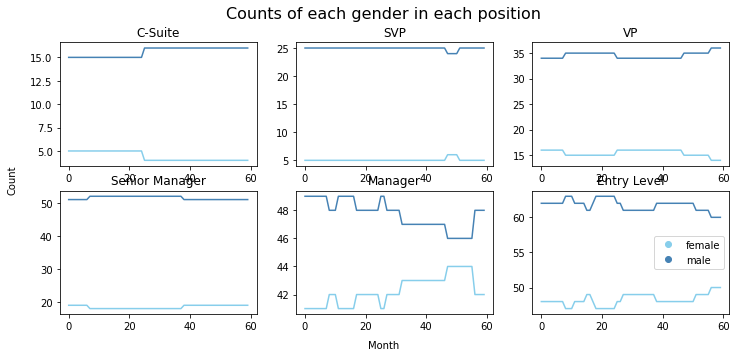

In [3]:
run_abm(months = 5*12,
        save_path='data/data.csv', # the path for saving the data
        company_titles = company_titles, # the job titles in the company
        titles_n = titles_n, # the number of employees with each of the titles
        weights = weights, # the weights for generating agents
        bias_scaler = 1, # the scaler for the bias calculated (negative = positive bias towards women, positive = positive bias towards men)
        diversity_bias_scaler = 1,
        threshold = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        parental_leave_weights = [0.001, 1], # yes, no
        plot_each_tick = False)

## Interventions

In [4]:
# reading in the company as is after the simulation of the time we have data for
company_validated = pd.read_pickle('data/company.pkl')

#### Shared parental leave?
* Make sure that company_validated is used
* Make sure probabilty of parental leave is half the value of that in the validation simulation


The current simulation assumes no change in the bias

tick 0 done
tick 1 done
tick 2 done
tick 3 done
tick 4 done
tick 5 done
tick 6 done
tick 7 done
tick 8 done
tick 9 done
tick 10 done
tick 11 done
tick 12 done
tick 13 done
tick 14 done
tick 15 done
tick 16 done
tick 17 done
tick 18 done
tick 19 done
tick 20 done
tick 21 done
tick 22 done
tick 23 done
tick 24 done
tick 25 done
tick 26 done
tick 27 done
tick 28 done
tick 29 done
tick 30 done
tick 31 done
tick 32 done
tick 33 done
tick 34 done
tick 35 done
tick 36 done
tick 37 done
tick 38 done
tick 39 done
tick 40 done
tick 41 done
tick 42 done
tick 43 done
tick 44 done
tick 45 done
tick 46 done
tick 47 done
tick 48 done
tick 49 done
tick 50 done
tick 51 done
tick 52 done
tick 53 done
tick 54 done
tick 55 done
tick 56 done
tick 57 done
tick 58 done
tick 59 done


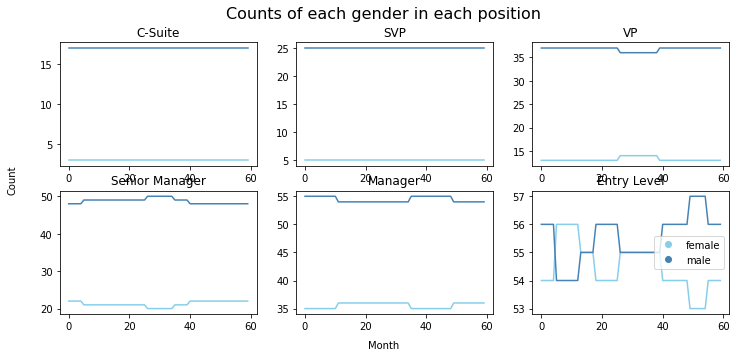

In [5]:
run_abm(months = 5*12,
        save_path='data/data_shared_parental.csv', # the path for saving the data
        company_titles = company_titles, # the job titles in the company
        titles_n = titles_n, # the number of employees with each of the titles
        weights = weights, # the weights for generating agents
        bias_scaler = 1, # the scaler for the bias calculated (negative = positive bias towards women, positive = positive bias towards men)
        diversity_bias_scaler = 1,
        threshold = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        parental_leave_weights = [0.001, 1], # yes, no
        plot_each_tick = False,
        intervention = 'shared_parental',
        company = company_validated)

## Mckinsey data
**2017**
entry level: 52, 48
manager: 63, 37
senior manager: 67, 33 
vice president: 72, 28 
senior vice president: 79, 21 
c-suite: 79, 21 

**2018**
entry level: 52, 48
manager: 62, 38
senior manager: 66, 34 
vice president: 71, 29 
senior vice president: 77, 23 
c-suite: 78, 22 

**2019**
entry level: 52, 48 
manager: 62, 38
senior manager: 65, 35
vice president: 69, 31 
senior vice president: 74, 26
c-suite: 78, 22 

**2020**
entry level: 53, 47
manager: 62, 38
senior manager: 67, 33
vice president: 71, 29
senior vice president: 72, 28
c-suite: 79, 21 

**2021**
entry level: 52, 48
manager: 59, 41
senior manager: 65, 35
vice president: 70, 30
senior vice president: 73, 27
c-suite: 76, 24 

In [6]:
data_dict = {'2017': {'Entry Level': [52, 48], 'Manager': [63, 37], 'Senior Manager': [67, 33], 'Vice President': [72, 28], 'Senior Vice President': [79, 21], 'C-suite': [79, 21]},
             '2018': {'Entry Level': [52, 48], 'Manager': [62, 38], 'Senior Manager': [66, 34], 'Vice President': [71, 29], 'Senior Vice President': [77, 23], 'C-suite': [78, 22]},
             '2019': {'Entry Level': [52, 48], 'Manager': [62, 38], 'Senior Manager': [65, 35], 'Vice President': [69, 31], 'Senior Vice President': [74, 26], 'C-suite': [78, 22]},
             '2020': {'Entry Level': [53, 47], 'Manager': [62, 38], 'Senior Manager': [67, 33], 'Vice President': [71, 29], 'Senior Vice President': [72, 28], 'C-suite': [79, 21]},
             '2021': {'Entry Level': [52, 48], 'Manager': [59, 41], 'Senior Manager': [65, 35], 'Vice President': [70, 30], 'Senior Vice President': [73, 27], 'C-suite': [76, 24]}}
data_percent_women = {'2017': {'Entry Level': 48, 'Manager': 37, 'Senior Manager': 33, 'Vice President': 28, 'Senior Vice President': 21, 'C-suite': 21},
             '2018': {'Entry Level': 48, 'Manager': 38, 'Senior Manager': 34, 'Vice President': 29, 'Senior Vice President': 23, 'C-suite': 22},
             '2019': {'Entry Level': 48, 'Manager': 38, 'Senior Manager': 35, 'Vice President': 31, 'Senior Vice President': 26, 'C-suite': 22},
             '2020': {'Entry Level': 47, 'Manager': 38, 'Senior Manager': 33, 'Vice President': 29, 'Senior Vice President': 28, 'C-suite': 21},
             '2021': {'Entry Level': 48, 'Manager': 41, 'Senior Manager': 35, 'Vice President': 30, 'Senior Vice President': 27, 'C-suite': 24}}

In [7]:
plot_data = pd.DataFrame.from_dict(data_percent_women, orient='index')

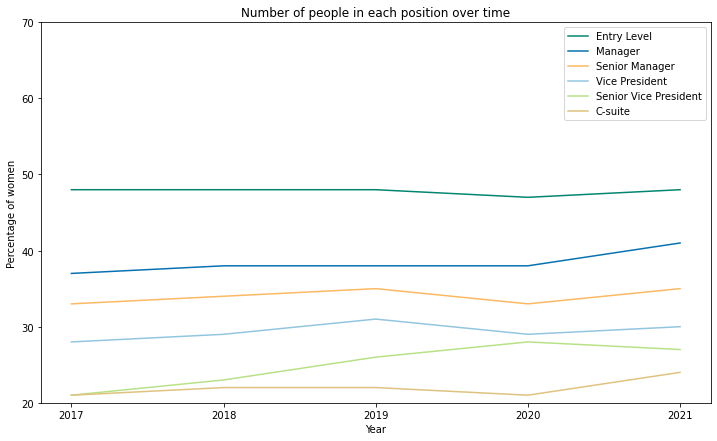

In [8]:
colors = ['#018571', '#0571B0', '#FDB863', '#92C5DE', '#B8E186', '#DFC27D']
# plt the plot_data
fig = plt.figure(figsize=(12,7))
# plot a line for each position (x axis is the year, y axis is the number of people in that position)
for i in range(len(plot_data.columns)):
    plt.plot(plot_data.index, plot_data.iloc[:, i], label=plot_data.columns[i], color = colors[i])
plt.legend()
# add a title
plt.title('Number of people in each position over time')
# add a label for the x axis
plt.xlabel('Year')
# add a label for the y axis
plt.ylabel('Percentage of women')
# set y-lim
plt.ylim([20, 70])
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

